array([[<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 1 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 5 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 20 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 60 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 120 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 240 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 720 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise corr(realised vol.), increment = 1400 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise corr(reali

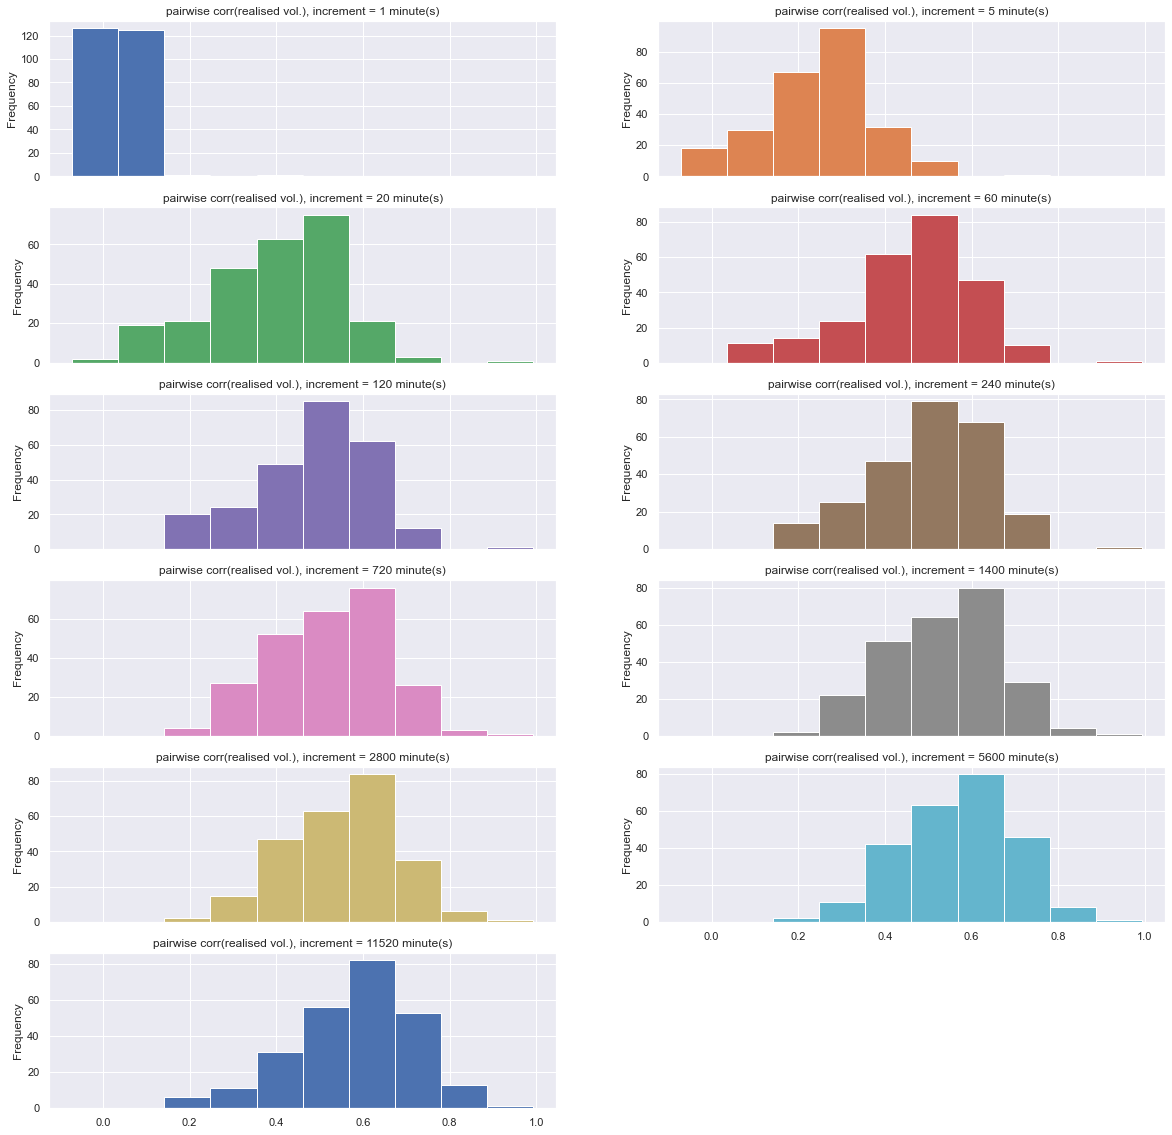

In [13]:
##### import os
import pandas as pd
import numpy as np
import datetime as dt
import pathlib
import re
import json
import math
import seaborn as sns
import matplotlib.pyplot as plt

symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
# symbols_list.remove('scbtc') 
symbols_list.remove('btcusdt')

returns_folder_name = "full_returns"
    
ts_list = []
for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

def compute_vol_corr_df(input_df, increments_list):
    corr_series_list = []
    squared_returns = all_returns_df.pow(2)
    for increment in increments_list:
        df = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)
        df = np.log(df) #### LOGGED VOLATILITIES
        corr_matrix = df.corr()
        upper_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        corr_series = corr_matrix.where(upper_mask).stack()
        corr_series.rename(increment, inplace=True)
        corr_series_list.append(corr_series)
    return pd.concat(corr_series_list, axis=1)

increments_list = [1, 5, 20, 60, 120, 240, 720, 1400, 1400 * 2, 1400 * 4, 1440 * 8]
sns.set_context('paper')
sns.set(rc={'figure.figsize':(20,20)}) 

df = compute_vol_corr_df(all_returns_df, increments_list)

info_string_list = [f"pairwise corr(realised vol.), increment = {increment} minute(s)" for increment in increments_list]

df.plot.hist(subplots=True, legend=False, layout=(6,2), title=info_string_list)

In [15]:
df.mean()

1        0.040085
5        0.248587
20       0.401090
60       0.462405
120      0.486577
240      0.504012
720      0.523917
1400     0.537981
2800     0.553391
5600     0.567960
11520    0.580252
dtype: float64

In [23]:
volatilities

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,neobtc,btctusd,etcbtc,ltcbtc,xrpbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0,0.001528,0.001420,0.000394,0.006100,0.000000,0.000819,0.000812,0.001012,0.001419,0.000273,...,0.001861,0.000000,0.000000,0.002198,0.003903,0.000904,0.000587,0.000556,0.000000,0.000870
1,0.001209,0.002690,0.000605,0.003876,0.001242,0.001056,0.000191,0.003040,0.000905,0.000880,...,0.000955,0.002677,0.001242,0.000592,0.002068,0.003532,0.001251,0.001061,0.000000,0.000914
2,0.000746,0.006194,0.000317,0.004428,0.000757,0.000721,0.000477,0.002128,0.002251,0.000707,...,0.000721,0.001095,0.002532,0.001122,0.004100,0.004989,0.000737,0.001418,0.013664,0.000982
3,0.003322,0.001198,0.003802,0.004567,0.001316,0.000610,0.001407,0.001506,0.006479,0.001940,...,0.003600,0.001095,0.001745,0.002710,0.001874,0.002603,0.002100,0.001277,0.009569,0.000355
4,0.001567,0.002367,0.003606,0.003386,0.003153,0.001679,0.003380,0.002272,0.004683,0.000859,...,0.003033,0.002191,0.004566,0.001373,0.002994,0.001560,0.001533,0.002387,0.000000,0.001634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,0.000711,0.001896,0.001624,0.003016,0.001663,0.001127,0.000000,0.003106,0.000557,0.002765,...,0.005756,0.000502,0.001079,0.003886,0.002867,0.004801,0.005247,0.004232,0.000000,0.003527
315644,0.000464,0.001503,0.000834,0.001790,0.001459,0.001950,0.001846,0.002836,0.001077,0.005264,...,0.003507,0.002581,0.002644,0.002242,0.001291,0.003969,0.003394,0.002913,0.000000,0.007004
315645,0.002461,0.002152,0.000627,0.002438,0.000872,0.001593,0.000670,0.003422,0.000880,0.002009,...,0.004952,0.001461,0.002413,0.001583,0.003712,0.003399,0.002736,0.005435,0.000000,0.006668
315646,0.003580,0.003747,0.001407,0.003466,0.003436,0.004767,0.001554,0.006109,0.002239,0.004102,...,0.008515,0.005351,0.001600,0.004868,0.005489,0.009421,0.005099,0.006988,0.000000,0.004420


In [24]:
np.log(volatilities)

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,neobtc,btctusd,etcbtc,ltcbtc,xrpbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0,-6.483994,-6.557435,-7.840342,-5.099528,-inf,-7.106955,-7.116422,-6.895440,-6.558072,-8.206916,...,-6.286699,-inf,-inf,-6.120259,-5.546102,-7.008776,-7.441198,-7.494756,-inf,-7.046835
1,-6.717987,-5.918048,-7.410354,-5.552912,-6.691311,-6.852986,-8.561562,-5.796052,-7.007336,-7.035716,...,-6.953465,-5.923044,-6.690786,-7.431781,-6.181128,-5.645848,-6.683495,-6.848154,-inf,-6.997250
2,-7.201290,-5.084214,-8.056646,-5.419818,-7.186073,-7.234193,-7.648224,-6.152342,-6.096553,-7.254506,...,-7.234837,-6.817283,-5.978901,-6.792323,-5.496697,-5.300582,-7.212245,-6.558504,-4.292990,-6.926318
3,-5.707123,-6.727166,-5.572353,-5.388966,-6.633138,-7.402601,-6.566639,-6.498400,-5.039131,-6.245071,...,-5.626800,-6.817283,-6.351085,-5.910986,-6.279856,-5.951026,-6.165767,-6.662863,-4.649179,-7.942212
4,-6.458728,-6.045951,-5.625030,-5.687984,-5.759464,-6.389648,-5.689912,-6.087001,-5.363877,-7.060221,...,-5.798336,-6.123588,-5.389217,-6.590868,-5.811242,-6.462769,-6.480522,-6.037521,-inf,-6.416792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,-7.248634,-6.268081,-6.422850,-5.803876,-6.399245,-6.788408,-inf,-5.774536,-7.493567,-5.890534,...,-5.157522,-7.597032,-6.831328,-5.550358,-5.854355,-5.338981,-5.250158,-5.464972,-inf,-5.647211
315644,-7.675613,-6.499975,-7.089505,-6.325399,-6.529665,-6.239853,-6.294600,-5.865494,-6.833871,-5.246841,...,-5.652955,-5.959450,-5.935500,-6.100319,-6.652163,-5.529118,-5.685825,-5.838417,-inf,-4.961292
315645,-6.007070,-6.141459,-7.375084,-6.016610,-7.044775,-6.442398,-7.308516,-5.677572,-7.036135,-6.209916,...,-5.307943,-6.528626,-6.026801,-6.448573,-5.596308,-5.684375,-5.901379,-5.214844,-inf,-5.010470
315646,-5.632509,-5.586806,-6.566486,-5.664646,-5.673329,-5.346096,-6.466827,-5.097960,-6.101770,-5.496208,...,-4.765960,-5.230426,-6.437903,-5.325159,-5.204950,-4.664863,-5.278667,-4.963560,-inf,-5.421611


In [26]:
np.log(diurnal_volatilities)

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,neobtc,btctusd,etcbtc,ltcbtc,xrpbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0.0,-5.884613,-5.738295,-6.154058,-5.616166,-5.801081,-5.741077,-5.952501,-5.704028,-5.942243,-5.656160,...,-5.783519,-5.553632,-5.736399,-5.623932,-5.707126,-5.361437,-5.866194,-5.496494,-5.793915,-5.325193
1.0,-6.182874,-5.940221,-6.414622,-5.862169,-6.078316,-5.949302,-6.180104,-5.879893,-6.133028,-5.936838,...,-5.949041,-5.713492,-5.970189,-5.879704,-5.996511,-5.500850,-6.067695,-5.763753,-6.056752,-5.460744
2.0,-6.179127,-5.981531,-6.502553,-5.893784,-6.173191,-6.012432,-6.314249,-5.969279,-6.191507,-6.019792,...,-5.996959,-5.796965,-6.097671,-5.918999,-6.038720,-5.579909,-6.105221,-5.849136,-6.188692,-5.623488
3.0,-6.161780,-5.982032,-6.479833,-5.888201,-6.154417,-6.041339,-6.285295,-5.937448,-6.232035,-6.009510,...,-6.007967,-5.771225,-6.132475,-5.931826,-6.002976,-5.594264,-6.096525,-5.863246,-6.213714,-5.705155
4.0,-6.236672,-6.040102,-6.530422,-5.944168,-6.245858,-6.083096,-6.365883,-5.966749,-6.271769,-6.071370,...,-6.061435,-5.866189,-6.206687,-6.010556,-6.091250,-5.630779,-6.158183,-5.924536,-6.467082,-5.760484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,-6.429178,-6.273800,-6.710688,-6.263256,-6.404589,-6.406639,-6.582777,-6.303515,-6.449404,-6.267331,...,-6.300916,-6.270783,-6.520987,-6.281606,-6.305047,-5.983593,-6.363617,-6.257629,-6.709358,-6.290289
284.0,-6.450760,-6.264837,-6.685335,-6.250863,-6.427577,-6.407516,-6.576023,-6.301903,-6.461504,-6.255482,...,-6.353843,-6.316323,-6.526598,-6.223881,-6.332480,-6.049043,-6.438915,-6.206746,-6.535592,-6.366597
285.0,-6.402377,-6.201957,-6.628805,-6.171455,-6.316056,-6.364810,-6.491231,-6.249535,-6.427124,-6.192146,...,-6.220633,-6.181623,-6.505289,-6.211810,-6.260891,-5.950683,-6.358414,-6.148835,-6.618515,-6.261433
286.0,-6.417550,-6.263370,-6.645527,-6.224015,-6.390204,-6.364180,-6.573829,-6.265483,-6.418879,-6.209536,...,-6.245586,-6.273974,-6.525287,-6.206094,-6.281116,-5.985218,-6.358468,-6.189790,-6.843652,-6.291893


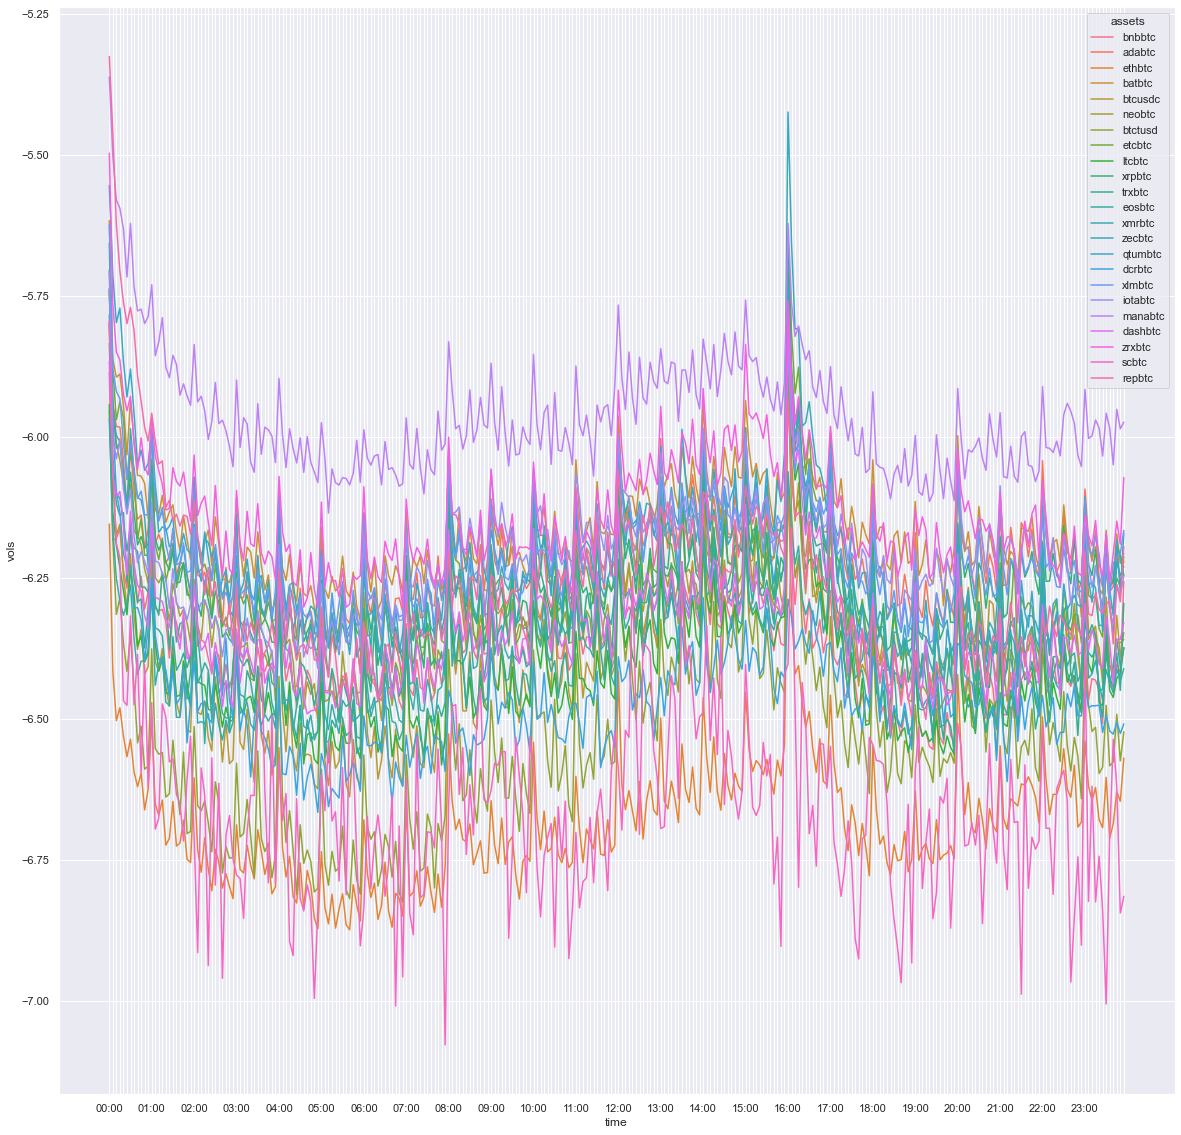

In [27]:
increment = 5
ticks = 1440 / increment

squared_returns = all_returns_df.pow(2)
volatilities = squared_returns.groupby(squared_returns.index // increment).sum().pow(1./2)
# volatilities = np.log(volatilities)
diurnal_volatilities = volatilities.groupby(volatilities.index % ticks).mean()
diurnal_volatilities = np.log(diurnal_volatilities)
time_of_day = (diurnal_volatilities.index.to_series() * increment * 60).astype(int).apply(lambda x: dt.datetime.utcfromtimestamp(x).strftime('%H:%M'))
timed_diurnal_volatilities = pd.concat([diurnal_volatilities, time_of_day], axis=1)
timed_diurnal_volatilities.rename(columns={0: 'time'}, inplace=True)
molten = timed_diurnal_volatilities.melt('time', var_name='assets', value_name='vols')
plt = sns.lineplot(data=molten, x='time', y='vols', hue='assets')
for i, label in enumerate(plt.xaxis.get_ticklabels()):
    if i % 12 != 0:
        label.set_visible(False)

In [17]:
volatilities

,bnbbtc,adabtc,ethbtc,batbtc,btcusdc,neobtc,btctusd,etcbtc,ltcbtc,xrpbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0,-6.483994,-6.557435,-7.840342,-5.099528,-inf,-7.106955,-7.116422,-6.895440,-6.558072,-8.206916,...,-6.286699,-inf,-inf,-6.120259,-5.546102,-7.008776,-7.441198,-7.494756,-inf,-7.046835
1,-6.717987,-5.918048,-7.410354,-5.552912,-6.691311,-6.852986,-8.561562,-5.796052,-7.007336,-7.035716,...,-6.953465,-5.923044,-6.690786,-7.431781,-6.181128,-5.645848,-6.683495,-6.848154,-inf,-6.997250
2,-7.201290,-5.084214,-8.056646,-5.419818,-7.186073,-7.234193,-7.648224,-6.152342,-6.096553,-7.254506,...,-7.234837,-6.817283,-5.978901,-6.792323,-5.496697,-5.300582,-7.212245,-6.558504,-4.292990,-6.926318
3,-5.707123,-6.727166,-5.572353,-5.388966,-6.633138,-7.402601,-6.566639,-6.498400,-5.039131,-6.245071,...,-5.626800,-6.817283,-6.351085,-5.910986,-6.279856,-5.951026,-6.165767,-6.662863,-4.649179,-7.942212
4,-6.458728,-6.045951,-5.625030,-5.687984,-5.759464,-6.389648,-5.689912,-6.087001,-5.363877,-7.060221,...,-5.798336,-6.123588,-5.389217,-6.590868,-5.811242,-6.462769,-6.480522,-6.037521,-inf,-6.416792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315643,-7.248634,-6.268081,-6.422850,-5.803876,-6.399245,-6.788408,-inf,-5.774536,-7.493567,-5.890534,...,-5.157522,-7.597032,-6.831328,-5.550358,-5.854355,-5.338981,-5.250158,-5.464972,-inf,-5.647211
315644,-7.675613,-6.499975,-7.089505,-6.325399,-6.529665,-6.239853,-6.294600,-5.865494,-6.833871,-5.246841,...,-5.652955,-5.959450,-5.935500,-6.100319,-6.652163,-5.529118,-5.685825,-5.838417,-inf,-4.961292
315645,-6.007070,-6.141459,-7.375084,-6.016610,-7.044775,-6.442398,-7.308516,-5.677572,-7.036135,-6.209916,...,-5.307943,-6.528626,-6.026801,-6.448573,-5.596308,-5.684375,-5.901379,-5.214844,-inf,-5.010470
315646,-5.632509,-5.586806,-6.566486,-5.664646,-5.673329,-5.346096,-6.466827,-5.097960,-6.101770,-5.496208,...,-4.765960,-5.230426,-6.437903,-5.325159,-5.204950,-4.664863,-5.278667,-4.963560,-inf,-5.421611


In [19]:
volatilities[volatilities == -np.inf].count() / 315846

bnbbtc     0.002840
adabtc     0.100245
ethbtc     0.002549
batbtc     0.032320
btcusdc    0.003726
neobtc     0.122139
btctusd    0.053453
etcbtc     0.051750
ltcbtc     0.004372
xrpbtc     0.015552
trxbtc     0.649475
eosbtc     0.055711
xmrbtc     0.006459
zecbtc     0.011718
qtumbtc    0.116038
dcrbtc     0.231616
xlmbtc     0.137729
iotabtc    0.028308
manabtc    0.171831
dashbtc    0.011493
zrxbtc     0.051554
scbtc      0.939793
repbtc     0.186442
dtype: float64